In [1]:
import sys
import os
%matplotlib inline

In [2]:
# get current working directory
os.getcwd()
# change directory
os.chdir('../')
os.getcwd()

'c:\\Users\\gtheis2\\git\\ACTC_MD_ML'

In [3]:
from rdkit.Chem.Draw import rdMolDraw2D
from src.trainers import Trainers
from src.polymerSMILES import polymers
from src.dataProcessing import * #DataPreprocessing #computeTanimotoSimilarity #* #data_load, computeTanimotoSimilarity, get_dissimilarity_map, featurizer, normalizedata
from src.solver import *

In [4]:
# load smiles
polymers_dict = polymers.get_data() # get rdkit formats of the polymer smiles 

In [5]:
# instantiate data preprocessing toolbox
preprocess = DataPreprocessing()

## A0 -No transfomation

In [6]:
data = preprocess.data_load(filename ='1-0-hgk-MD-ActCoeff-processed_Activity.csv')

In [7]:
## assign X, y
(X, y, MFprints) = preprocess.featurizer(data, polymers_dict,  'activity') # descr = 'solvation' or 'activity'

## A1/A2 -PCA transfomation

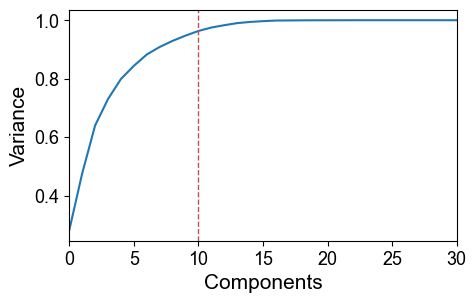

In [8]:
preprocess.visualize_PCA(x = X, length = MFprints.shape[1], type = 'ALL')

In [9]:
(data_solvation_scaler, X_train, X_test, y_train, y_test) = preprocess.normalizedata(X, y, splitRatio=0.2, state = 48, transform = True, property = None)
print(f"X_train, X_test, y_train, & y_test has shapes of {X_train.shape}, {X_test.shape}, {y_train.shape}, & {y_test.shape} respectively.")

X_train, X_test, y_train, & y_test has shapes of (64, 153), (16, 153), (64,), & (16,) respectively.


In [10]:
# transform features using PCA
print("***********************A1*************************")
pca_X_train_MDFP, pca_X_test_MDFP = preprocess.convertInputsPCA(X_train, X_test, MFprints, n_comp = 15, type = 'MDFP')
print(f"pca_X_train_MDFP & pca_X_test_MDFP has shapes of {pca_X_train_MDFP.shape}, and {pca_X_test_MDFP.shape}, respectively.")
#
print("***********************A2*************************")
pca_X_train_ALL, pca_X_test_ALL = preprocess.convertInputsPCA(X_train, X_test, MFprints, n_comp = 15, type = 'All')
print(f"pca_X_train_ALL & pca_X_test_ALL has shapes of {pca_X_train_ALL.shape}, and {pca_X_test_ALL.shape}, respectively.")



***********************A1*************************
pca_X_train_MDFP & pca_X_test_MDFP has shapes of (64, 40), and (16, 40), respectively.
***********************A2*************************
pca_X_train_ALL & pca_X_test_ALL has shapes of (64, 15), and (16, 15), respectively.


## ML models
## Hyperpaermater optimization
## SVR

In [11]:
solver = svrSolvers()
trainer = Trainers()

res = solver.svrSolver(X_train=pca_X_train_ALL,
                X_test=pca_X_test_ALL,
                y_train=y_train,
                y_test=y_test)

h_params, best_F = solver.get_best(res)

score = trainer.trainSVR_SingleOutput(h_params=h_params,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test,
                        folds=5)


{'C': 41.76049826978715, 'epsilon': 0.012286352598724284}
{'C': 72.0604168948716, 'epsilon': 6.053628126910477}
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        2 |      1 |             - |             -
{'C': 72.0604168948716, 'epsilon': 0.3009392332060581}
{'C': 41.76049826978715, 'epsilon': 6.069687443092774}
{'C': 52.864167896745705, 'epsilon': 5.949025304005646}
{'C': 72.0604168948716, 'epsilon': 0.5072755760661412}
     2 |        6 |      1 |  0.000000E+00 |             f
{'C': 41.76049826978715, 'epsilon': 1.7926026381996865}
{'C': 66.10316060065897, 'epsilon': 0.3009392332060581}
{'C': 72.0604168948716, 'epsilon': 0.0298703801962584}
{'C': 78.65931170889557, 'epsilon': 0.013811636386431708}
     3 |       10 |      1 |  0.0309778916 |         ideal
{'C': 72.0604168948716, 'epsilon': 0.014091181742050613}
{'C': 76.22069036392507, 'epsilon': 0.02940404251381104}
{'C': 75.0676412559542, 'epsilon': 2.457827844596563}
{'C': 69.17206279904605, 'epsilon': 0.

In [12]:
print(h_params)
print("%0.2f accuracy with a standard deviation of %0.2f. R^2: %0.2f" %
        (score[0], score[1], score[2]))

{'C': 99.87571284612757, 'epsilon': 0.023340201888221765}
0.95 accuracy with a standard deviation of 0.03. R^2: 0.87


## Hyper-parameter optimization(ANN regression)

In [13]:
solver = annSolvers()
trainer = Trainers()

res = solver.annSolver(X_train=pca_X_train_ALL,
                X_test=pca_X_test_ALL,
                y_train=y_train,
                y_test=y_test)

h_params, best_F = solver.get_best(res)

score = trainer.trainANN_SingleOutput(h_params=h_params,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test,
                        folds=5)



n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        2 |      2 |             - |             -
     2 |        6 |      2 |  1.2340429114 |         ideal
     3 |       10 |      2 |  5.1094949656 |         ideal
     4 |       14 |      2 |  0.8766751758 |         ideal
     5 |       18 |      2 |  0.8375721041 |         ideal
     6 |       22 |      2 |  0.000000E+00 |             f
     7 |       26 |      2 |  0.000000E+00 |             f
     8 |       30 |      2 |  0.0067740297 |         ideal
     9 |       34 |      2 |  0.000000E+00 |             f
    10 |       38 |      2 |  0.000000E+00 |             f


In [14]:
print(h_params)
print("%0.2f accuracy with a standard deviation of %0.2f. R^2: %0.2f" %
        (score[0], score[1], score[2]))

activation                 = ['logistic', 'tanh', 'relu']
solver                     = ['lbfgs', 'adam']
learning_rate              = ['constant', 'invscaling', 'adaptive']

{'alpha': 0.1, 'learning_rate_init': 1.0, 'activation_idx': 1, 'solver_idx': 0, 'learning_rate_idx': 1}
0.96 accuracy with a standard deviation of 0.02. R^2: 0.85


## Hyper parameter optimization (random forest regression)

In [15]:
solver = rfrSolvers()
trainer = Trainers()


res = solver.rfrSolver(X_train=pca_X_train_ALL,
                X_test=pca_X_test_ALL,
                y_train=y_train,
                y_test=y_test)

h_params, best_F = solver.get_best(res)

score = trainer.trainRFR_SingleOutput(h_params=h_params,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test,
                        folds=5)



ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gtheis2\AppData\Local\anaconda3\envs\practice\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gtheis2\AppData\Local\anaconda3\envs\practice\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\gtheis2\AppData\Local\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\gtheis2\AppData\Local\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'bootstrap' parameter of RandomForestRegressor must be an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int'. Got 'False' instead.


In [ ]:
max_features = ['auto', 'sqrt','log2']
bootstrap = ['True', 'False']
print(h_params)
print("%0.2f accuracy with a standard deviation of %0.2f. R^2: %0.2f" %
        (score[0], score[1], score[2]))

{'max_depth': 59, 'n_estimators': 44, 'max_features_idx': 1, 'bootstrap_idx': 1, 'min_weight_fraction_leaf': 0.00016097904672728605}
0.93 accuracy with a standard deviation of 0.04. R^2: 0.70


## load the model to predict unseen data

In [ ]:
import joblib

model_filename='c:/Users/gtheis2/git/ACTC_MD_ML/models/activity-coefficient/Activityco_SVR_A2.pkl'
# load the model from disk
loaded_model = joblib.load(model_filename)

c:\Users\gtheis2\AppData\Local\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVR from version 0.23.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


c:\Users\gtheis2\AppData\Local\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\gtheis2\AppData\Local\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


c:\Users\gtheis2\git\ACTC_MD_ML\src\dataProcessing.py:384: UserWarning: You passed a edgecolor/edgecolors ('teal') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y_train, y_predicted_train,facecolors='teal',edgecolors='teal',s=25, label="Train",marker = 'x')
c:\Users\gtheis2\git\ACTC_MD_ML\src\dataProcessing.py:385: UserWarning: You passed a edgecolor/edgecolors ('gold') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y_test, y_predicted_test,facecolors='red',edgecolors='gold',s=25, label="Test",marker = 'x')


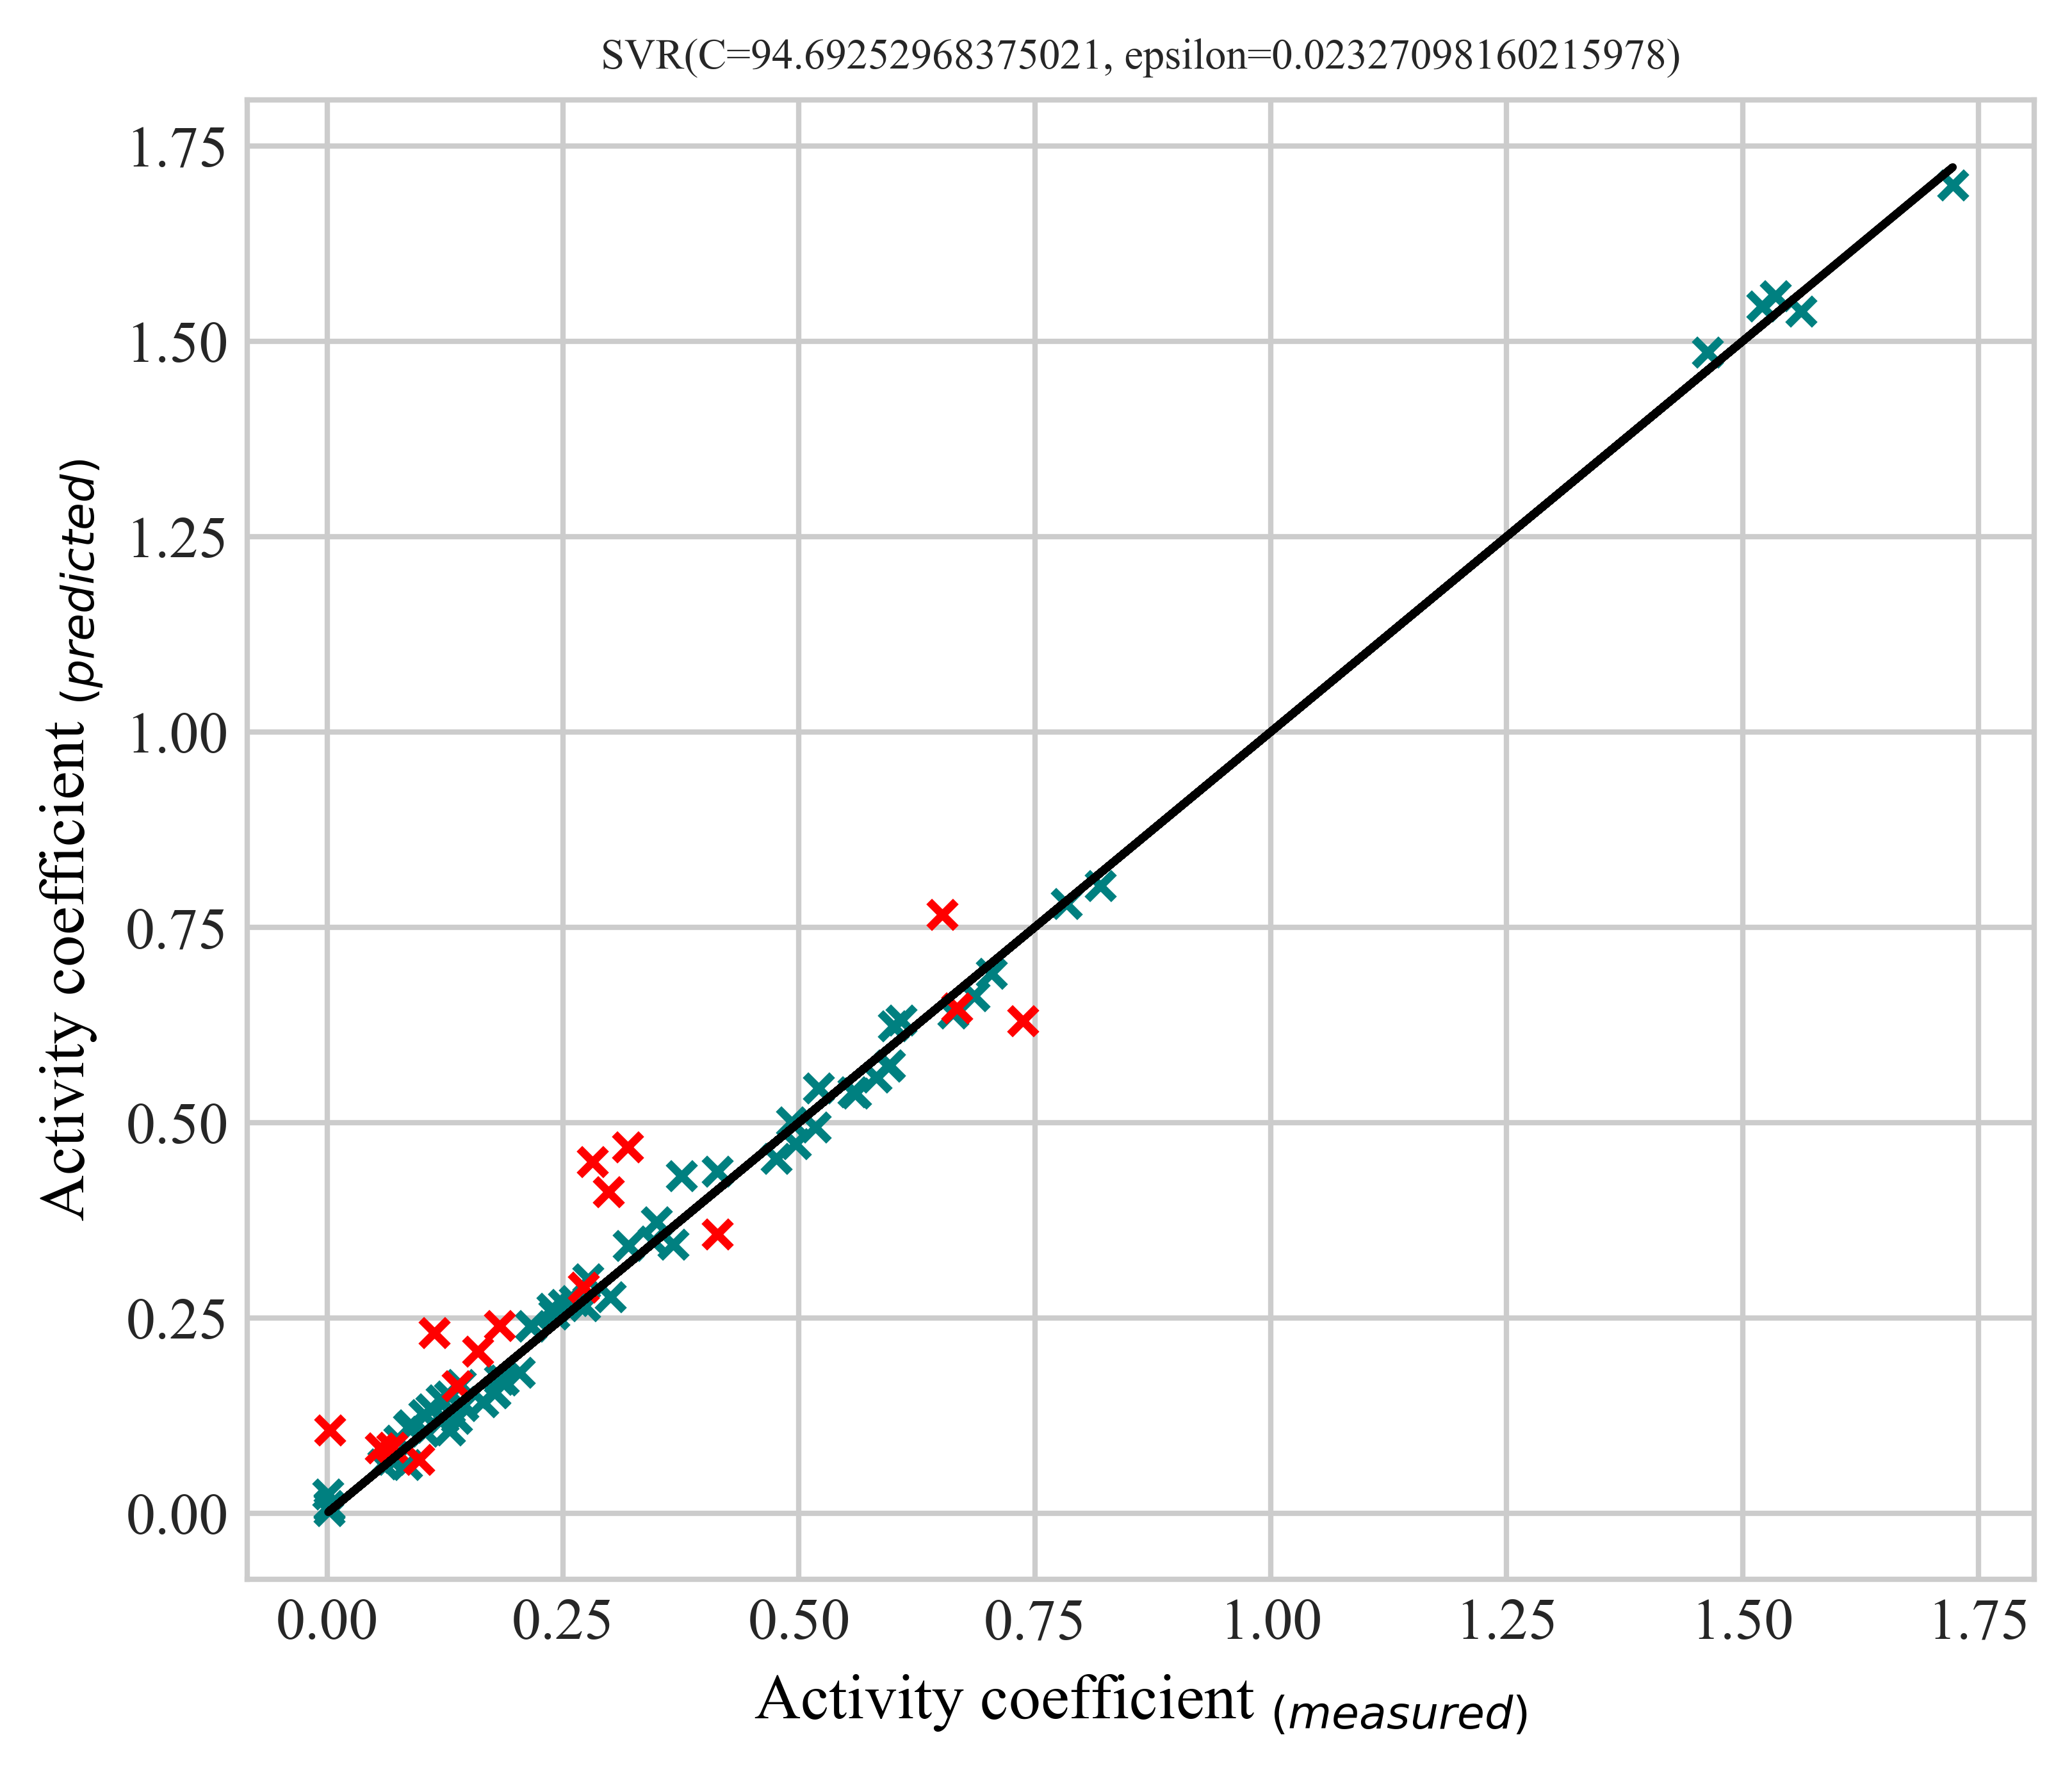

In [ ]:
preprocess.plot(loaded_model,pca_X_train_ALL,y_train,pca_X_test_ALL,y_test)